## ***Project Overview***

*This project aims to develop robust machine learning models for fraud detection in e-commerce and banking transactions. The primary objectives include analyzing transaction data, performing data preprocessing, engineering fraud-related features, and training both machine learning and deep learning models to identify fraudulent activities effectively.*

*In this section of the notebook, we will focus on exploratory data analysis (EDA) and preprocessing the data to ensure it is ready for modeling.*

In [1]:
## Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

import sys
sys.path.append('../scripts')
import data_preprocessing as dp
import data_analysis as da

### ***1. Load Data***

In [2]:
#load the dataset from a csv file
df_credit_card = pd.read_csv('../data/creditcard.csv')
df_fraud_data = pd.read_csv('../data/Fraud_Data.csv')
df_ip_adress = pd.read_csv('../data/IpAddress_to_Country.csv')

In [3]:
## view sample of the data
df_credit_card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
## view sample of the data
df_fraud_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [5]:
## view sample of the data
df_ip_adress.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


### ***2. Data Preprocessing***

In [6]:
## General information about the credit card dataset
df_credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
## General Statistics about the credit card dataset
df_credit_card.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
## General information about the fraud dataset
df_fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


In [9]:
## General Statistics about the fraud dataset
df_fraud_data.describe()

,user_id,purchase_value,age,ip_address,class
count,151112.000000,151112.000000,151112.000000,1.511120e+05,151112.000000
mean,200171.040970,36.935372,33.140704,2.152145e+09,0.093646
std,115369.285024,18.322762,8.617733,1.248497e+09,0.291336
min,2.000000,9.000000,18.000000,5.209350e+04,0.000000
25%,100642.500000,22.000000,27.000000,1.085934e+09,0.000000
50%,199958.000000,35.000000,33.000000,2.154770e+09,0.000000
75%,300054.000000,49.000000,39.000000,3.243258e+09,0.000000
max,400000.000000,154.000000,76.000000,4.294850e+09,1.000000


In [10]:
## General information about the ip adress dataset
df_ip_adress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lower_bound_ip_address  138846 non-null  float64
 1   upper_bound_ip_address  138846 non-null  int64  
 2   country                 138846 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ MB


##### ***OBSERVATION***

- *The credit card dataset does not contain any missing values, and all the data types appear to be appropriate.*
- *The fraud dataset does not contain any missing values. However, the columns 'purchase_time', 'signup_time', and 'ip_address' need to be converted to the correct data types.*
- *The IP address dataset does not contain any missing values. The 'lower_bound_ip_address' column requires a data type conversion.*

In [11]:
## Change datatypes to datetime
dp.into_datetime(df_fraud_data)

In [12]:
## Ip into integer format for both df_fraud_data and df_ip_adress
dp.into_integer(df_fraud_data, df_ip_adress)

In [13]:
## check for duplicates
print(f"Duplicate rows in Credit Card dataset: {df_fraud_data.duplicated().sum()}")
print(f"Duplicate rows in Credit Card dataset: {df_credit_card.duplicated().sum()}")
print(f"Duplicate rows in Credit Card dataset: {df_ip_adress.duplicated().sum()}")

Duplicate rows in Credit Card dataset: 0
Duplicate rows in Credit Card dataset: 1081
Duplicate rows in Credit Card dataset: 0


In [14]:
## drop duplicates
df_credit_card.drop_duplicates(inplace=True)

#### ***2.1 Merge Datasets***

In [15]:
## Merge the df_id and df_fraud based on the ip_address 

def ip_to_country(ip):
    ## Function to get country from ip
    try:
        return df_ip_adress.country[(df_ip_adress.lower_bound_ip_address < ip) & (df_ip_adress.upper_bound_ip_address > ip)].iloc[0]
    except IndexError:
        return "Unknown"   
    
df_fraud_data['country'] = df_fraud_data['ip_address'].apply(ip_to_country)

In [16]:
## Check for the newly added column
df_fraud_data['country'].head()

0            Japan
1    United States
2    United States
3          Unknown
4    United States
Name: country, dtype: object

### ***3. Exploratory Data Analysis***

#### ***3.1 Univariate Analysis***

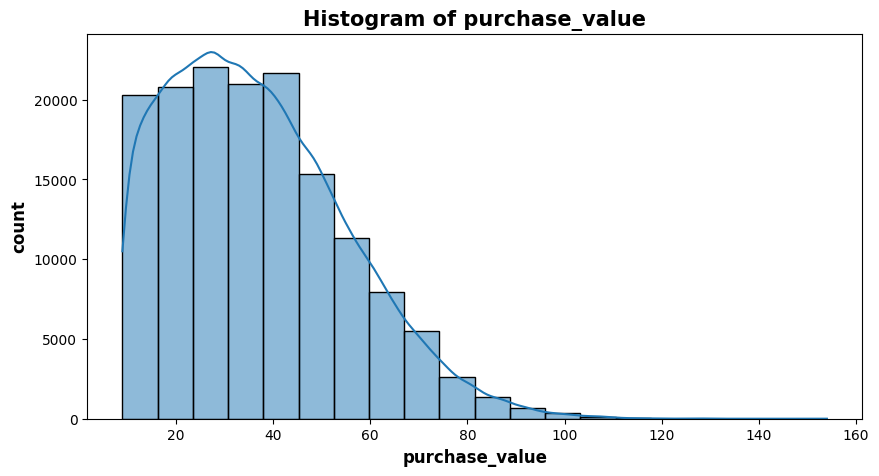

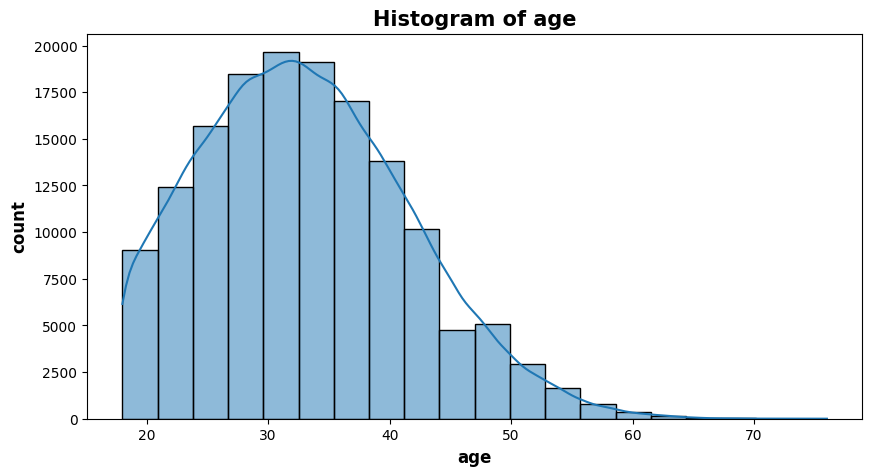

In [17]:
## plot distribution for numerical columns
da.univariate_numerical(df_fraud_data)

Text(0, 0.5, 'Count')

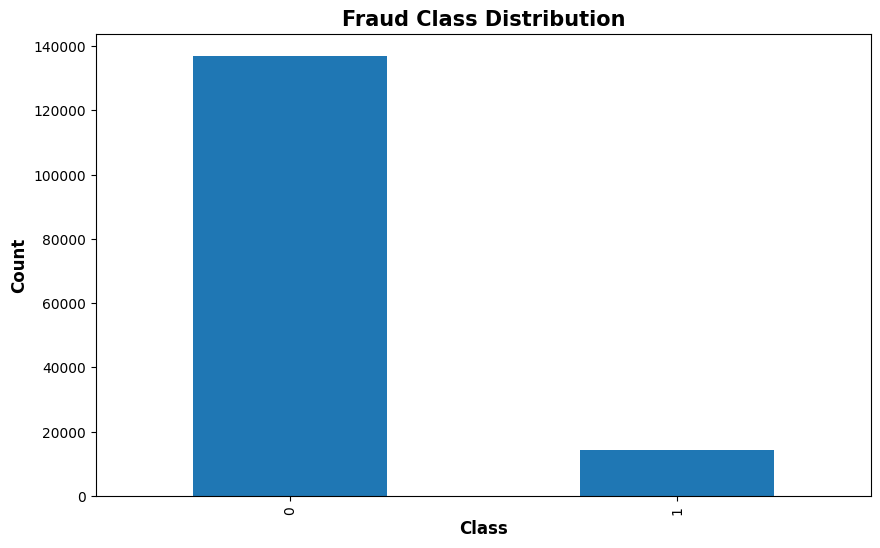

In [18]:
## count plot for the top countries
df_fraud_data['class'].value_counts().plot(kind='bar', figsize=(10,6))
plt.title('Fraud Class Distribution', fontweight='bold', fontsize=15)
plt.xlabel('Class', fontweight='bold', fontsize=12)
plt.ylabel('Count', fontweight='bold', fontsize=12)

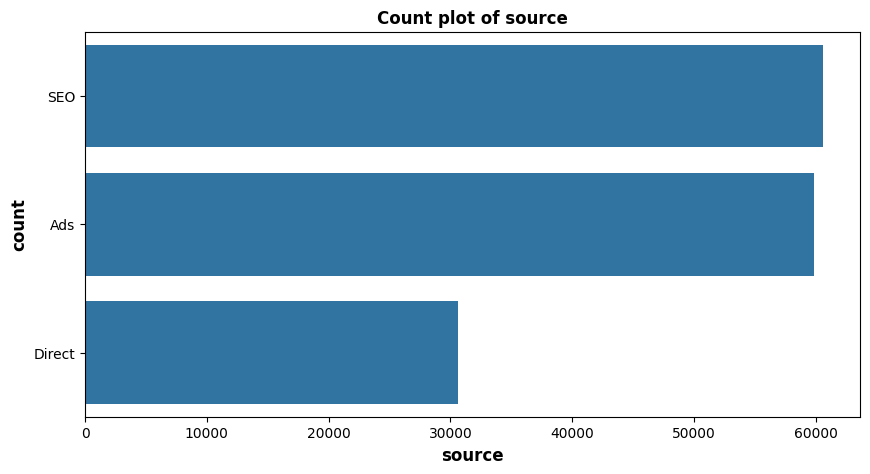

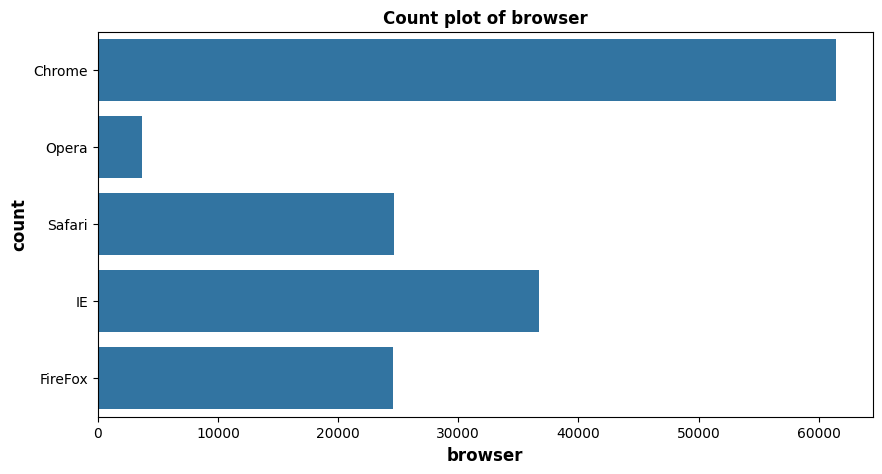

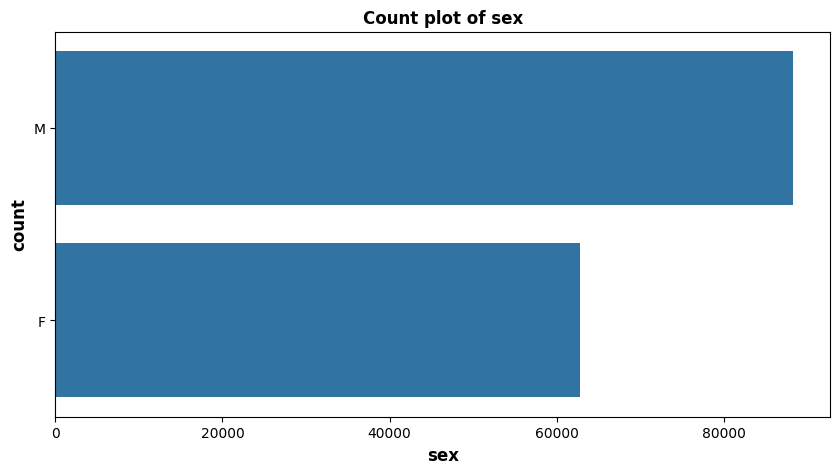

In [19]:
## plot distribution for categorical columns
da.univariate_categorical(df_fraud_data)

Text(0, 0.5, 'Count')

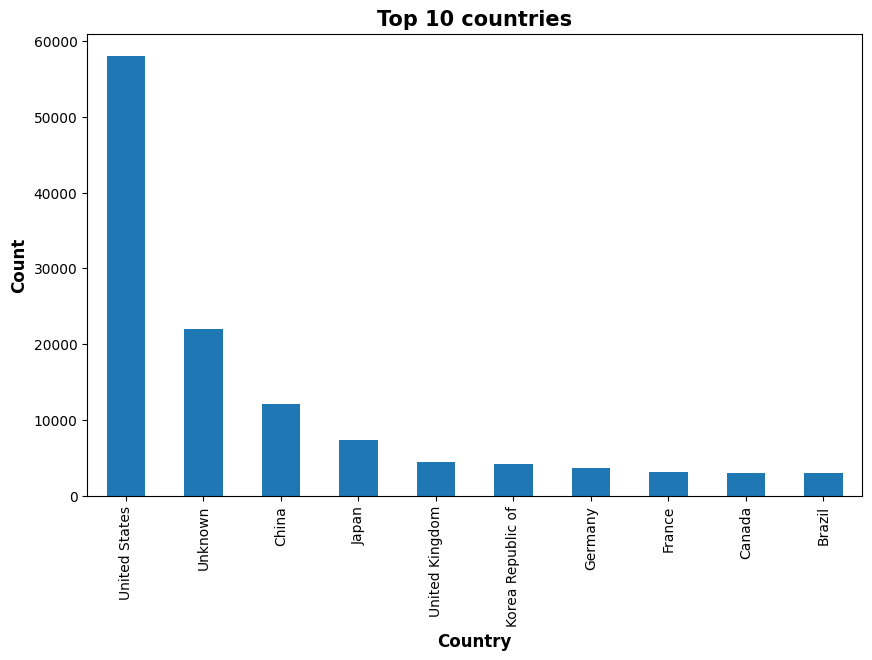

In [20]:
## count plot for the top 10 countries
df_fraud_data['country'].value_counts().head(10).plot(kind='bar', figsize=(10,6))
plt.title('Top 10 countries', fontweight='bold', fontsize=15)
plt.xlabel('Country', fontweight='bold', fontsize=12)
plt.ylabel('Count', fontweight='bold', fontsize=12)

#### ***3.2 Bivariate Analysis***

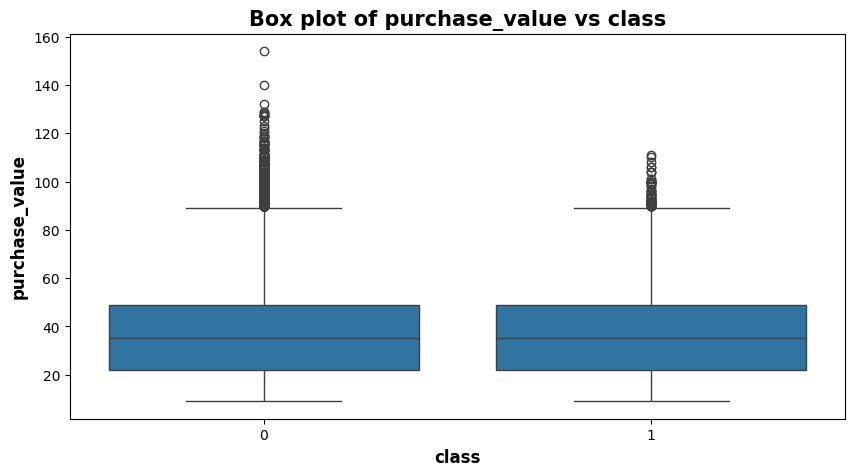

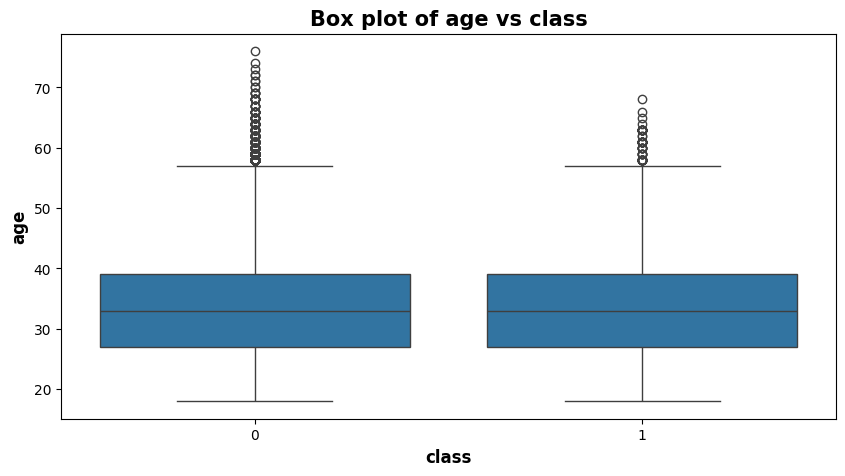

In [21]:
## Bivariant analysis
da.bivariate_numerical(df_fraud_data)

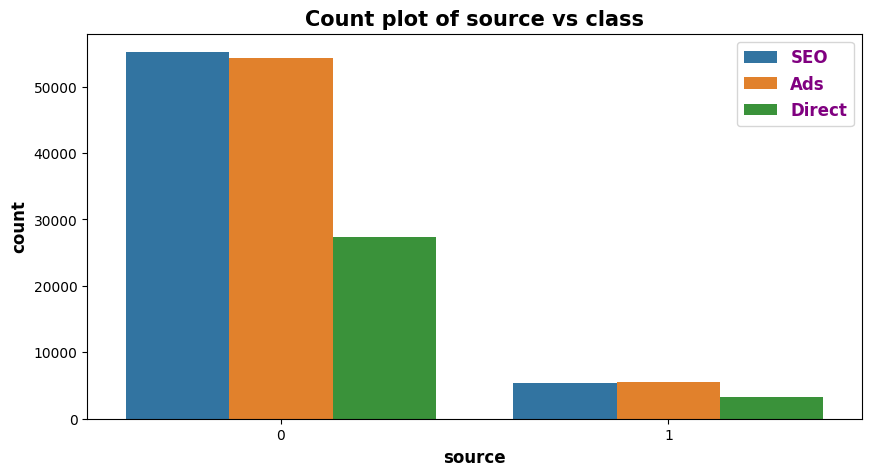

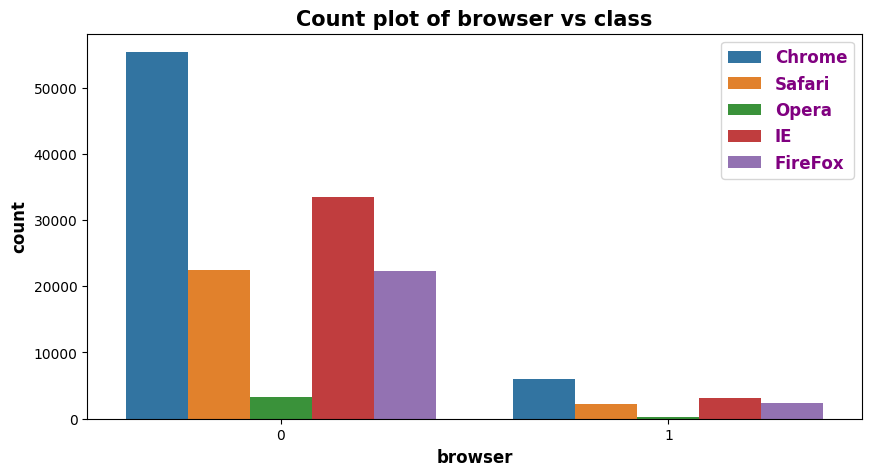

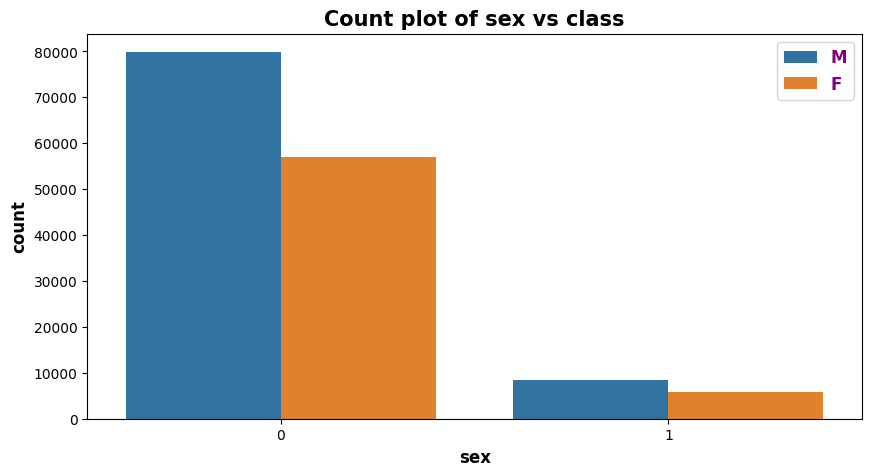

In [22]:
## bivariate analysis for categorical columns
da.bivariate_categorical(df_fraud_data)

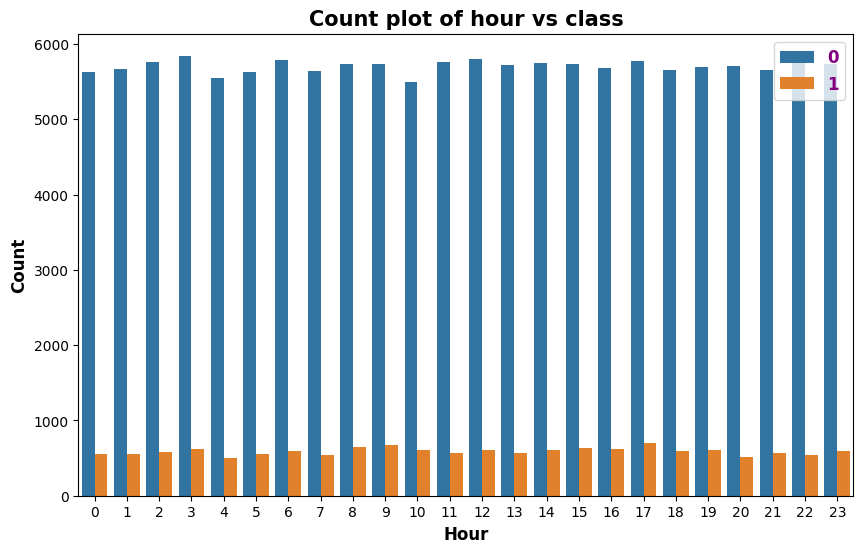

In [23]:
## take the time from the purchase time and identify when the fraud occurs
df_fraud_data['hour'] = df_fraud_data['purchase_time'].dt.hour

## plot the hour against the target variable
plt.figure(figsize=(10,6))
sns.countplot(x='hour',hue='class', data=df_fraud_data)
plt.title(f'Count plot of hour vs class', fontweight='bold', fontsize=15)
plt.xlabel('Hour', fontweight='bold', fontsize=12)
plt.ylabel('Count', fontweight='bold', fontsize=12)
plt.legend(prop={'weight': 'bold', 'size': 12}, labelcolor='purple')

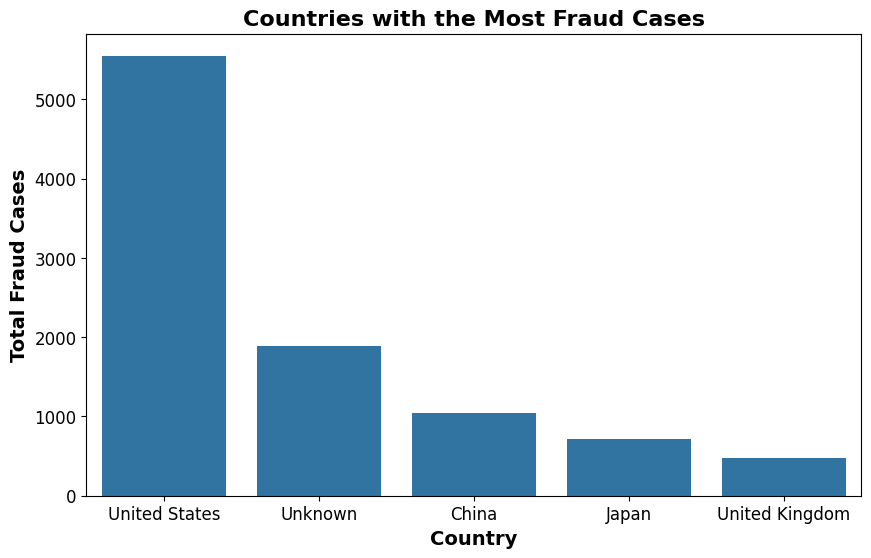

In [24]:
## Find the top 5 countries with the most fraud cases
# Group by country and calculate total fraud cases
fraud_counts = df_fraud_data.groupby("country")["class"].sum().reset_index()

# Sort by fraud cases in descending order
fraud_counts = fraud_counts.sort_values(by="class", ascending=False).head(5)

# Plot the result
plt.figure(figsize=(10, 6))
sns.barplot(data=fraud_counts, x="country", y="class")
plt.title("Countries with the Most Fraud Cases", fontsize=16, fontweight="bold")
plt.xlabel("Country", fontsize=14, fontweight="bold")
plt.ylabel("Total Fraud Cases", fontsize=14, fontweight="bold")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

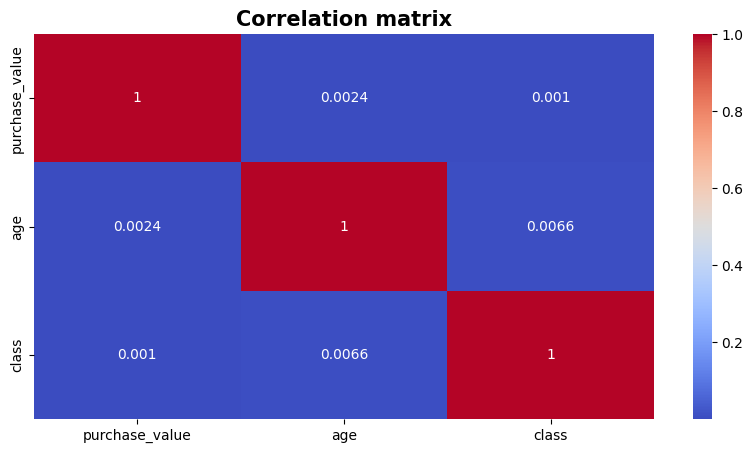

In [25]:
## correlation matrix
da.correlation_matrix(df_fraud_data)

### ***4. Feature Engineering***

In [26]:
## Extract time features
df_fraud_data['month'] = df_fraud_data['purchase_time'].dt.month
df_fraud_data['day'] = df_fraud_data['purchase_time'].dt.day
df_fraud_data['weekday'] = df_fraud_data['purchase_time'].dt.weekday
df_fraud_data['hour'] = df_fraud_data['purchase_time'].dt.hour

In [27]:
df_fraud_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,hour,month,day,weekday
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368,0,Japan,2,4,18,5
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,350311387,0,United States,1,6,8,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2621473820,1,United States,18,1,1,3
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3840542443,0,Unknown,13,5,4,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,415583117,0,United States,18,9,9,2


In [28]:
## Transaction frequency
transaction_frequency = df_fraud_data.groupby(['user_id']).size().reset_index(name='frequency')

# Merge frequency back to fraud_data
df_fraud_data = df_fraud_data.merge(transaction_frequency, on=['user_id'], how='left')

In [29]:
## Transaction velocity
# Summing purchase values per user per day (i.e., transaction velocity)
transaction_velocity = df_fraud_data.groupby(['user_id'])['purchase_value'].sum().reset_index(name='velocity')

# Merge velocity back to fraud_data
df_fraud_data = df_fraud_data.merge(transaction_velocity, on=['user_id'], how='left')

In [30]:
df_fraud_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,hour,month,day,weekday,frequency,velocity
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368,0,Japan,2,4,18,5,1,34
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,350311387,0,United States,1,6,8,0,1,16
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2621473820,1,United States,18,1,1,3,1,15
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3840542443,0,Unknown,13,5,4,0,1,44
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,415583117,0,United States,18,9,9,2,1,39


### ***5. Normalization and Scaling***

In [31]:
## Scaling
columns_to_be_scaled = ['purchase_value', 'age','ip_address','velocity']
scaler = MinMaxScaler()
df_fraud_data[columns_to_be_scaled] = scaler.fit_transform(df_fraud_data[columns_to_be_scaled])

In [32]:
df_fraud_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,hour,month,day,weekday,frequency,velocity
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,0.172414,QVPSPJUOCKZAR,SEO,Chrome,M,0.362069,0.170603,0,Japan,2,4,18,5,1,0.172414
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,0.048276,EOGFQPIZPYXFZ,Ads,Chrome,F,0.603448,0.081554,0,United States,1,6,8,0,1,0.048276
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,0.041379,YSSKYOSJHPPLJ,SEO,Opera,M,0.603448,0.610371,1,United States,18,1,1,3,1,0.041379
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,0.241379,ATGTXKYKUDUQN,SEO,Safari,M,0.396552,0.894219,0,Unknown,13,5,4,0,1,0.241379
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,0.206897,NAUITBZFJKHWW,Ads,Safari,M,0.465517,0.096752,0,United States,18,9,9,2,1,0.206897


### ***6. Categorical Feature Encoding***

In [33]:
## # One-Hot Encoding for categorical features
categorical_features = ['source', 'browser', 'sex']

# Perform One-Hot Encoding and drop the first category to avoid multicollinearity
df_fraud_data = pd.get_dummies(df_fraud_data, columns=categorical_features, drop_first=True)

# Display the first few rows of the updated DataFrame
df_fraud_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,age,ip_address,class,country,hour,...,weekday,frequency,velocity,source_Direct,source_SEO,browser_FireFox,browser_IE,browser_Opera,browser_Safari,sex_M
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,0.172414,QVPSPJUOCKZAR,0.362069,0.170603,0,Japan,2,...,5,1,0.172414,False,True,False,False,False,False,True
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,0.048276,EOGFQPIZPYXFZ,0.603448,0.081554,0,United States,1,...,0,1,0.048276,False,False,False,False,False,False,False
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,0.041379,YSSKYOSJHPPLJ,0.603448,0.610371,1,United States,18,...,3,1,0.041379,False,True,False,False,True,False,True
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,0.241379,ATGTXKYKUDUQN,0.396552,0.894219,0,Unknown,13,...,0,1,0.241379,False,True,False,False,False,True,True
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,0.206897,NAUITBZFJKHWW,0.465517,0.096752,0,United States,18,...,2,1,0.206897,False,False,False,False,False,True,True


In [34]:
## Export the cleaned data
df_fraud_data.to_csv('../data/cleaned_fraud_data.csv', index=False)